In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ebola = pd.read_csv('./data/country_timeseries.csv', parse_dates=['Date'])

In [3]:
ebola.index = ebola['Date']

In [4]:
new_id = pd.date_range(ebola.index.min(), ebola.index.max())
new_id

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')

In [5]:
new_id = reversed(new_id)

In [6]:
new_id

In [7]:
for i in new_id:
    print(i)

2015-01-05 00:00:00
2015-01-04 00:00:00
2015-01-03 00:00:00
2015-01-02 00:00:00
2015-01-01 00:00:00
2014-12-31 00:00:00
2014-12-30 00:00:00
2014-12-29 00:00:00
2014-12-28 00:00:00
2014-12-27 00:00:00
2014-12-26 00:00:00
2014-12-25 00:00:00
2014-12-24 00:00:00
2014-12-23 00:00:00
2014-12-22 00:00:00
2014-12-21 00:00:00
2014-12-20 00:00:00
2014-12-19 00:00:00
2014-12-18 00:00:00
2014-12-17 00:00:00
2014-12-16 00:00:00
2014-12-15 00:00:00
2014-12-14 00:00:00
2014-12-13 00:00:00
2014-12-12 00:00:00
2014-12-11 00:00:00
2014-12-10 00:00:00
2014-12-09 00:00:00
2014-12-08 00:00:00
2014-12-07 00:00:00
2014-12-06 00:00:00
2014-12-05 00:00:00
2014-12-04 00:00:00
2014-12-03 00:00:00
2014-12-02 00:00:00
2014-12-01 00:00:00
2014-11-30 00:00:00
2014-11-29 00:00:00
2014-11-28 00:00:00
2014-11-27 00:00:00
2014-11-26 00:00:00
2014-11-25 00:00:00
2014-11-24 00:00:00
2014-11-23 00:00:00
2014-11-22 00:00:00
2014-11-21 00:00:00
2014-11-20 00:00:00
2014-11-19 00:00:00
2014-11-18 00:00:00
2014-11-17 00:00:00


In [8]:
ebola.reindex(new_id)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,


In [9]:
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [10]:
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


In [11]:
# 국가별 최초 발병일 => last_valid
# ebola 최초 발병일 => ebola.index.min()
# 국가별 발병지연시간 => last_valid - ebola.index.min()

In [12]:
shift_values = last_valid - ebola.index.min()
shift_values

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]

In [13]:
ebola10 = ebola.Day.head(10)
ebola10

Date
2015-01-05    289
2015-01-04    288
2015-01-03    287
2015-01-02    286
2014-12-31    284
2014-12-28    281
2014-12-27    280
2014-12-24    277
2014-12-21    273
2014-12-20    272
Name: Day, dtype: int64

In [14]:
ebola10.shift(5)

Date
2015-01-05      NaN
2015-01-04      NaN
2015-01-03      NaN
2015-01-02      NaN
2014-12-31      NaN
2014-12-28    289.0
2014-12-27    288.0
2014-12-24    287.0
2014-12-21    286.0
2014-12-20    284.0
Name: Day, dtype: float64

In [15]:
ebola.tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2014-03-27,2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
2014-03-26,2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2014-03-24,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-22,2014-03-22,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values[idx].days
#     print(d)
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted

In [17]:
ebola_shift = pd.DataFrame(ebola_dict)
ebola_shift

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288,2775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287,2769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,2014-12-31,284,2730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-27,2014-03-27,5,103.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,66.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN
2014-03-26,2014-03-26,4,86.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,62.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
2014-03-25,2014-03-25,3,86.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,60.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN


In [18]:
ebola_shift.tail(30)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2014-05-23,2014-05-23,62,258.0,13.0,81.0,NaN,NaN,NaN,NaN,NaN,174.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN
2014-05-12,2014-05-12,51,248.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,171.0,12.0,6.0,NaN,NaN,NaN,NaN,NaN
2014-05-10,2014-05-10,49,233.0,13.0,79.0,NaN,NaN,NaN,NaN,NaN,157.0,12.0,6.0,NaN,NaN,NaN,NaN,NaN
2014-05-07,2014-05-07,46,236.0,13.0,50.0,NaN,NaN,NaN,NaN,NaN,158.0,12.0,6.0,NaN,NaN,NaN,NaN,NaN
2014-05-05,2014-05-05,44,235.0,12.0,16.0,NaN,NaN,NaN,NaN,NaN,157.0,11.0,5.0,NaN,NaN,NaN,NaN,NaN
2014-05-03,2014-05-03,42,231.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,155.0,11.0,0.0,NaN,NaN,NaN,NaN,NaN
2014-05-01,2014-05-01,40,226.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,149.0,11.0,0.0,NaN,NaN,NaN,NaN,NaN
2014-04-26,2014-04-26,35,224.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,143.0,11.0,0.0,NaN,NaN,NaN,NaN,NaN
2014-04-24,2014-04-24,33,NaN,13.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.0,NaN,NaN,NaN,NaN,NaN


In [19]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date','Day'], axis=1)

In [20]:
ebola_shift.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Day,,,,,,,,,,,,,,,,
289,2776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,2775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,2769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,2730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
ebola_shift.tail()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Day,,,,,,,,,,,,,,,,
5,103.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,66.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN
4,86.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,62.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
3,86.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,60.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
2,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
0,49.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,29.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN


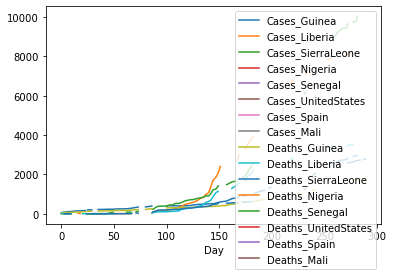

In [22]:
ebola_shift.iloc[:,:].plot()